<a href="https://colab.research.google.com/github/Shahin2512/Machine-Learning/blob/main/Regularization_in_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data = data[data['Species'] != 'Iris-setosa']
data


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data['Species'] = data['Species'].map({'Iris-versicolor':0,'Iris-virginica':1})
data.head()

<ipython-input-8-245cb30f1332>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Species'] = data['Species'].map({'Iris-versicolor':0,'Iris-virginica':1})


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,0
51,52,6.4,3.2,4.5,1.5,0
52,53,6.9,3.1,4.9,1.5,0
53,54,5.5,2.3,4.0,1.3,0
54,55,6.5,2.8,4.6,1.5,0


In [ ]:
### Split dataset into independent and dependent features
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)

In [ ]:
#create a model
model = LogisticRegression()

In [ ]:
#hyperparameters
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [ ]:
# Create the GridSearchCV object
classifier_regressor=GridSearchCV(model,param_grid=parameter,scoring='accuracy',cv=5)

In [ ]:
# Fit the grid search to your data
classifier_regressor.fit(x_train,y_train)

In [ ]:
#hyperparameters tuning
GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [ ]:
print(classifier_regressor.best_params_)
print(classifier_regressor.best_score_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}
1.0


In [ ]:
#prediction
prediction = classifier_regressor.predict(x_test)

In [ ]:
score=accuracy_score(prediction,y_test)
print(score)

1.0


In [ ]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        11

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



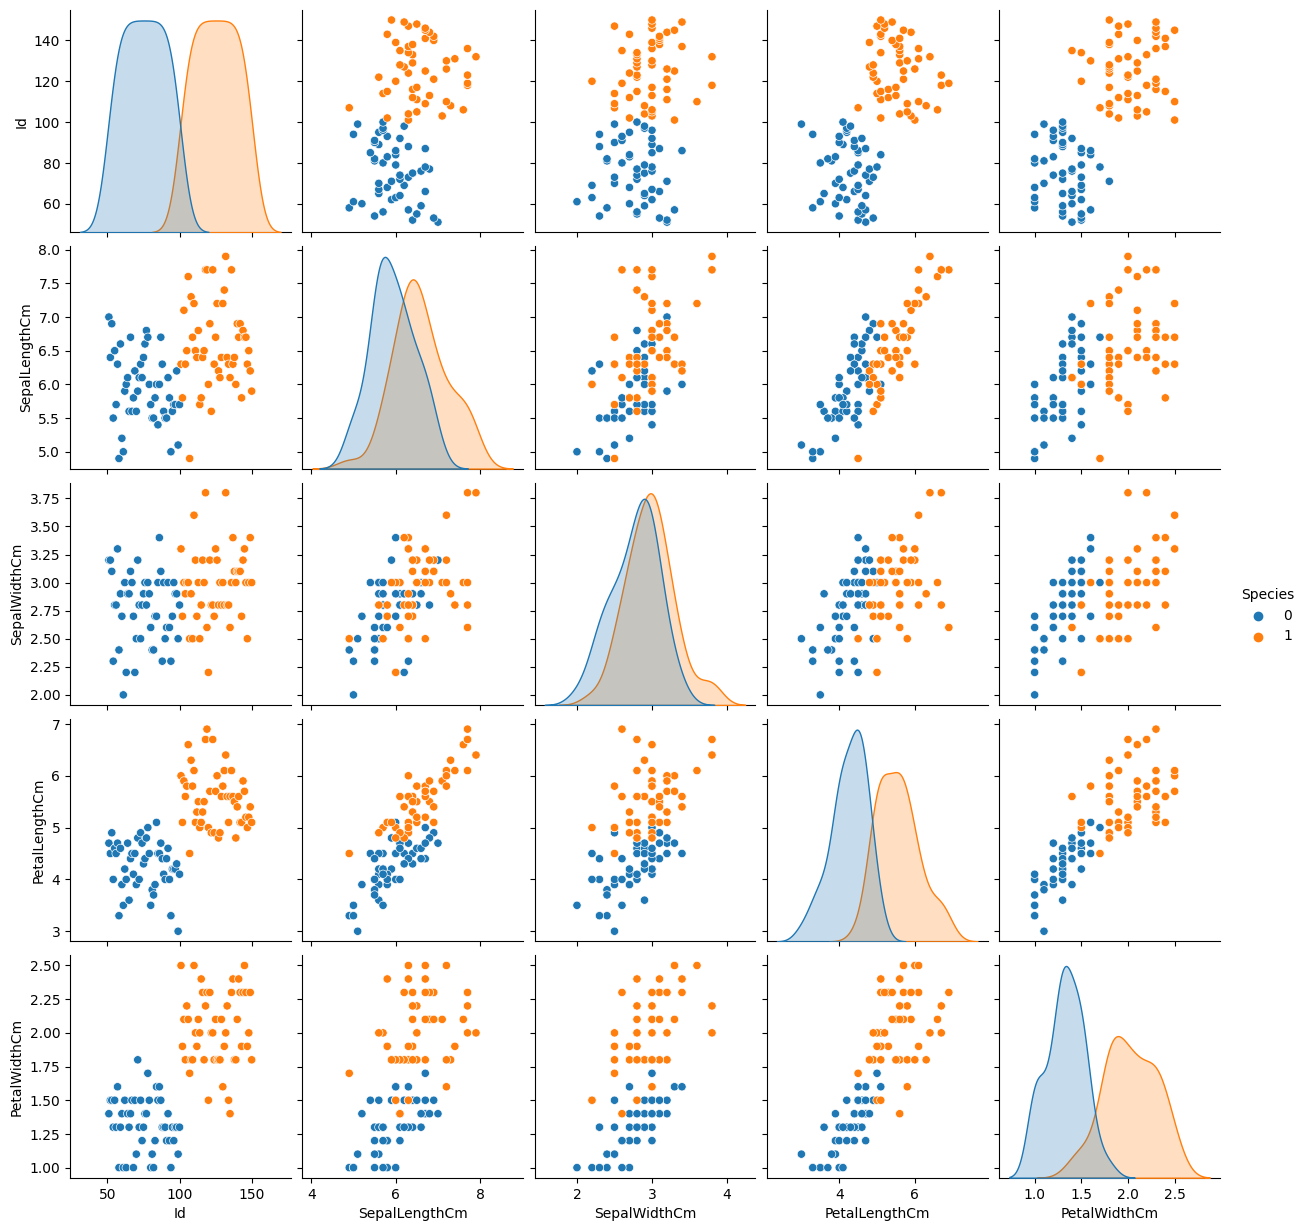

In [ ]:

sns.pairplot(data,hue='Species')

In [ ]:
# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Implement Logistic Regression with L1 penalty (Lasso regularization)
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.5)  # Choose the value of C
log_reg_l1.fit(x_train, y_train)
y_pred_l1 = log_reg_l1.predict(x_test)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)

In [ ]:
# Implement Logistic Regression with L2 penalty (Ridge regularization)
log_reg_l2 = LogisticRegression(penalty='l2', C=0.5)  # Choose the value of C
log_reg_l2.fit(x_train, y_train)
y_pred_l2 = log_reg_l2.predict(x_test)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)

In [ ]:
print(f"Accuracy with L1 regularization: {accuracy_l1}")
print(f"Accuracy with L2 regularization: {accuracy_l2}")

Accuracy with L1 regularization: 1.0
Accuracy with L2 regularization: 1.0
